# Introduction

In this section, we are going to explore the <a href="Lung_Cancer_Dataset.csv">Lung cancer dataset</a>, an we will generate pie plots that will answer the following questions:

<ul>
<li>Are people with chronic deisease more in risk of having lung cancer?</li>
<li>Is shortness of breath mostly a direct sumptom of lung cancer?</li>
<li>What gender suffers more of lung cancer?</li>
</ul>

## Process

To achieve it, we will need to do the following:

<ol>
<li>Import the libraries (Pandas, matplotlib, and seaborn) and prepare the dataset</li>
<li>Clean the dataset and change make changes to it as needed in the tasks</li>
<li>Generate the subplots</li>
</ol>

# Import libraries and dataset

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
lung_cancer_df = pd.read_csv("Lung_Cancer_Dataset.csv")
lung_cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Clean the DataFrame

We will start by checking for any null value in the DataFrame

In [35]:
lung_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Since there are no null values in teh DataFrame, we will not need to clean it, however, we will replace the values 1 and 2 (indicating no and yes respectively) by 0 and 1 to indicate no and yes respectively, this step will be done in order to make the DataFrame clearer

In [36]:
lung_cancer_df = lung_cancer_df.replace([1, 2], [0, 1])

In [37]:
lung_cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


# Generate the plots

We will first start by creating DataFrames containing only the cases that have lung cancer and that align with each question

In [38]:
#With chronic disease
chronic = lung_cancer_df.loc[:, ["CHRONIC DISEASE", "LUNG_CANCER"]][lung_cancer_df.LUNG_CANCER == "YES"].replace([0, 1], ["WITHOUT", "WITH"])["CHRONIC DISEASE"]

#With shortness of breath
breath = lung_cancer_df.loc[:, ["SHORTNESS OF BREATH", "LUNG_CANCER"]][lung_cancer_df.LUNG_CANCER == "YES"].replace([0, 1], ["NO", "YES"])["SHORTNESS OF BREATH"]

#Depending on gender
gender = lung_cancer_df.loc[:, ["GENDER", "LUNG_CANCER"]][lung_cancer_df.LUNG_CANCER == "YES"]["GENDER"]

All we need to do now is graph the pie plots

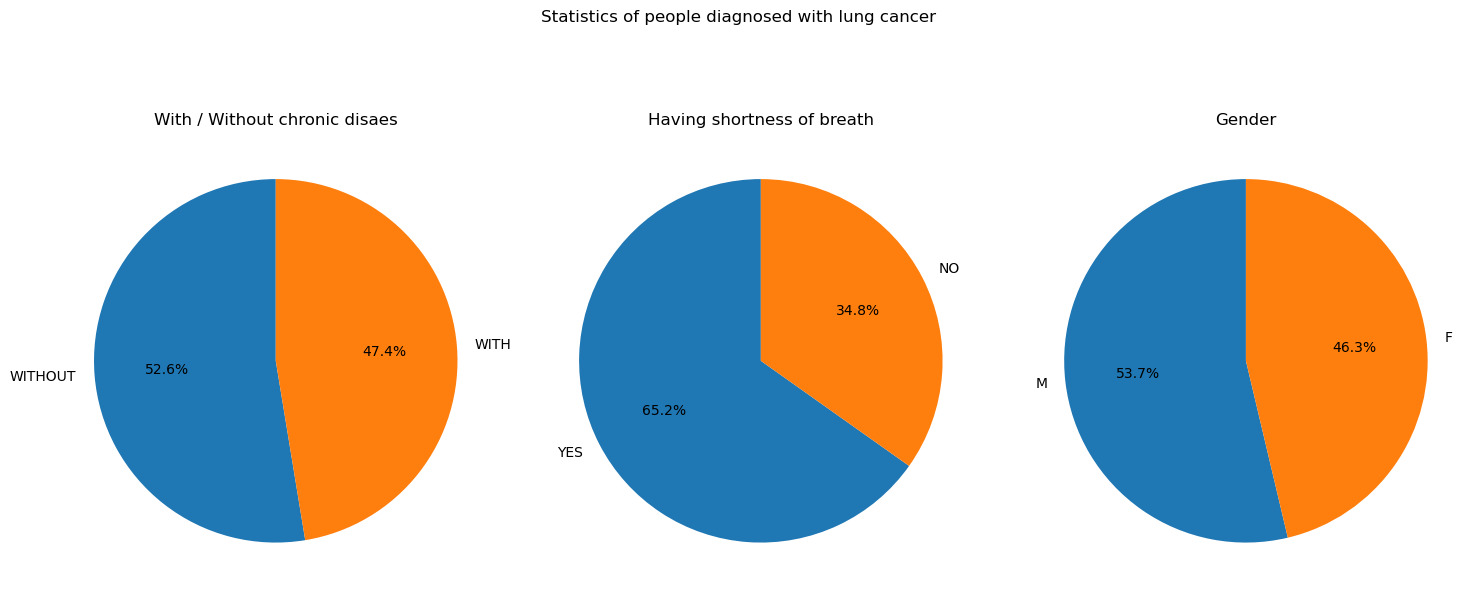

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
fig.suptitle("Statistics of people diagnosed with lung cancer")

# First question (Chrocnic disease)
axes[0].pie(chronic.value_counts(), labels=chronic.unique(), autopct='%1.1f%%', startangle=90)
axes[0].set_title('With / Without chronic disaes')

# Second question (Breath shortness)
axes[1].pie(breath.value_counts(), labels=breath.unique(), autopct='%1.1f%%', startangle=90)
axes[1].set_title('Having shortness of breath')

# Third question (Gender)
axes[2].pie(gender.value_counts(), labels=gender.unique(), autopct='%1.1f%%', startangle=90)
axes[2].set_title('Gender')

plt.tight_layout()
plt.show()

# Observations

By looking at the graphs, we can answer the questions easily:


<b>Are people with chronic deisease more in risk of having lung cancer?</b> <br>
Not really, only 47.5% of people diagnosed with lung cancer actually have a chronic disease

<b>Is shortness of breath mostly a direct sumptom of lung cancer?</b><br>
Mostly yes, 65.2% of people diagnosed with lung cancer suffer of shortness of breath, which inidicates that shortness of breath is a symptom of lung disease 

<b>What gender suffers more of lung cancer?</b><br>
With only a difference of 7.4%, 53.7% of patients diagnosed with lung cancer are Male


# Conclusion

In these analytics, we were able to understand a lot about lung cancer using the information collected in the dataset, we were able to explore and asnwer our initial questions which shows how data analytics can help us summarize and collect valuable information